In [1]:
import pydot
from IPython.display import SVG
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
# graphs = pydot.graph_from_dot_file("dot_files/1.dot")
# graph = graphs[0]

In [3]:
# # SVG(graph.create_svg())
# graph.write_png('output.png')

In [7]:
points_dict = {}
with open("data/points.txt") as f:
    line_str = f.readline() 
    while line_str:
        tmp = line_str.split("#")
        points = tmp[1].replace("\n","")
        points = points.split(";")
        points = [[float(x) for x in point.split(",")] for point in points]
        x_arr = [el[0] for el in points]
        y_arr = [el[1] for el in points]
        x_vel_arr = [el[2] for el in points]
        y_vel_arr = [el[3] for el in points]
        points_dict[int(tmp[0])] = {
            "x":x_arr,
            "y":y_arr,
            "x_vel":x_vel_arr,
            "y_vel":y_vel_arr
        }
        line_str = f.readline()
    

ValueError: could not convert string to float: ''

In [8]:
# list(points_dict.keys())

In [9]:
df_1 = pd.DataFrame.from_dict(points_dict[1])
df_1['speed'] = df_1['x_vel']*df_1['x_vel'] + df_1['y_vel']*df_1['y_vel']
df_1['speed'] = np.sqrt(df_1['speed'])
df_1.head()

,x,y,x_vel,y_vel,speed
0,84.175392,39.597981,1.566198,1.596880,2.236739
1,19.908783,33.577831,1.536459,0.555549,1.633812
2,47.812662,62.989773,0.729569,1.026802,1.259600
3,91.762966,63.599493,1.434594,0.283205,1.462281
4,1.657503,24.449512,0.274463,1.608354,1.631604


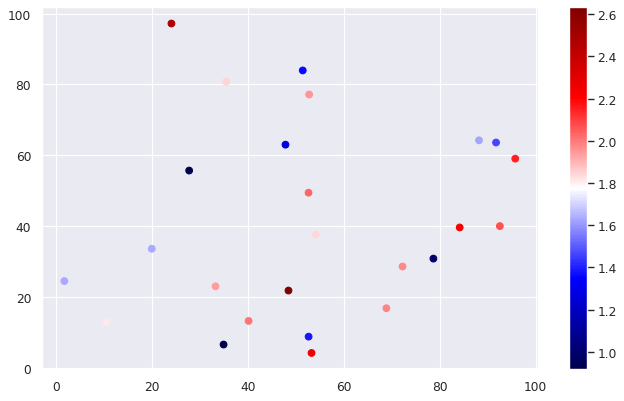

In [10]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x=df_1['x'], y=df_1['y'], c=df_1['speed'], cmap='seismic')
cbar = plt.colorbar()

In [11]:
df_2 = pd.DataFrame.from_dict(points_dict[100])
df_2['speed'] = df_2['x_vel']*df_2['x_vel'] + df_2['y_vel']*df_2['y_vel']
df_2['speed'] = np.sqrt(df_2['speed'])
df_2.head()

KeyError: 100

In [12]:
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x=df_2['x'], y=df_2['y'], c=df_2['speed'], cmap='seismic')
cbar = plt.colorbar()

NameError: name 'df_2' is not defined

<Figure size 800x480 with 0 Axes>